In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snehi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_dir='data/aclImdb'

In [4]:
def load_sentiment_data(data_type,data_dir):
    data = []
    for category in ["pos", "neg"]:
        category_dir = os.path.join(data_dir, data_type, category)
        for filename in os.listdir(category_dir):
            with open(os.path.join(category_dir, filename), 'r', encoding="utf-8") as file:
                numbers = re.findall(r'\d+', filename)
                rec_id = int(numbers[0])
                rating = int(numbers[1])
                text = file.read()
                data.append([rec_id,text, category,rating])
    return pd.DataFrame(data, columns=["rec_id","text", "sentiment","rating"])

# Train Data

In [5]:
train_df=load_sentiment_data("train",data_dir)

In [6]:
train_df.head()

,rec_id,text,sentiment,rating
0,4715,For a movie that gets no respect there sure ar...,pos,9
1,12390,Bizarre horror movie filled with famous faces ...,pos,8
2,8329,"A solid, if unremarkable film. Matthau, as Ein...",pos,7
3,9063,It's a strange feeling to sit alone in a theat...,pos,8
4,3092,"You probably all already know this by now, but...",pos,10


In [7]:
train_df['sentiment'].value_counts()

sentiment
pos    12500
neg    12500
Name: count, dtype: int64

In [9]:
train_df['rating'].value_counts()

rating
1     5100
10    4732
8     3009
4     2696
7     2496
3     2420
2     2284
9     2263
Name: count, dtype: int64

## Train data is a balanced dataset

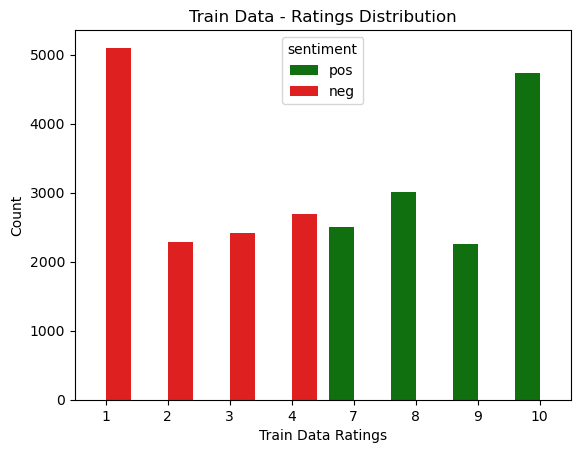

In [18]:
sns.barplot(x='rating', y=train_df['rating'].groupby(train_df['rating']).transform('count'), data=train_df, hue='sentiment', palette={'pos': 'g', 'neg': 'r'})
plt.xlabel('Train Data Ratings')
plt.ylabel('Count')
plt.title('Train Data - Ratings Distribution')
plt.show()

In [29]:
stop_words = set(stopwords.words('english'))

In [31]:
text = ' '.join(train_df['text'])

In [32]:
words = word_tokenize(text)

In [33]:
filtered_words = [word for word in words if word.lower() not in stop_words]

In [34]:
filtered_text = ' '.join(filtered_words)

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Word Cloud of Train Data

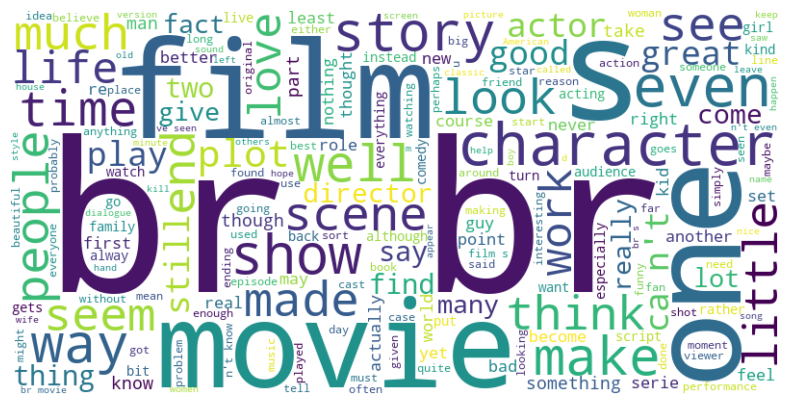

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

# Test Data

In [13]:
test_df=load_sentiment_data("test",data_dir)

In [14]:
test_df.head()

,rec_id,text,sentiment,rating
0,4715,"Based on an actual story, John Boorman shows t...",pos,9
1,1930,This is a gem. As a Film Four production - the...,pos,9
2,3205,"I really like this show. It has drama, romance...",pos,9
3,10186,This is the best 3-D experience Disney has at ...,pos,10
4,147,"Of the Korean movies I've seen, only three had...",pos,10


In [15]:
test_df['sentiment'].value_counts()

sentiment
pos    12500
neg    12500
Name: count, dtype: int64

In [16]:
test_df['rating'].value_counts()

rating
1     5022
10    4999
8     2850
4     2635
3     2541
9     2344
7     2307
2     2302
Name: count, dtype: int64

## Test data is a balanced dataset

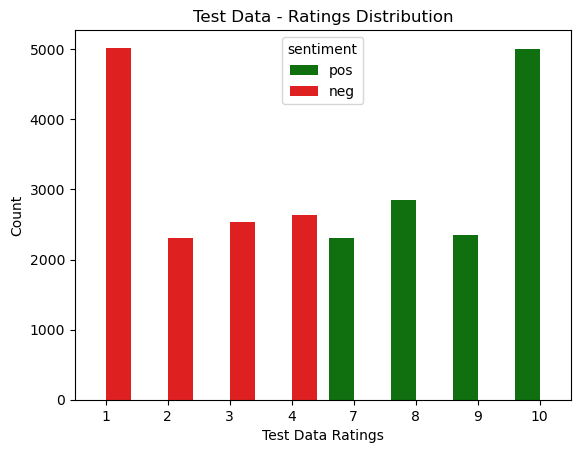

In [19]:
sns.barplot(x='rating', y=test_df['rating'].groupby(test_df['rating']).transform('count'), data=test_df, hue='sentiment', palette={'pos': 'g', 'neg': 'r'})
plt.xlabel('Test Data Ratings')
plt.ylabel('Count')
plt.title('Test Data - Ratings Distribution')
plt.show()

In [37]:
text = ' '.join(test_df['text'])

In [38]:
words = word_tokenize(text)

In [39]:
filtered_words = [word for word in words if word.lower() not in stop_words]

In [40]:
filtered_text = ' '.join(filtered_words)

In [41]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Word Cloud of Test Data

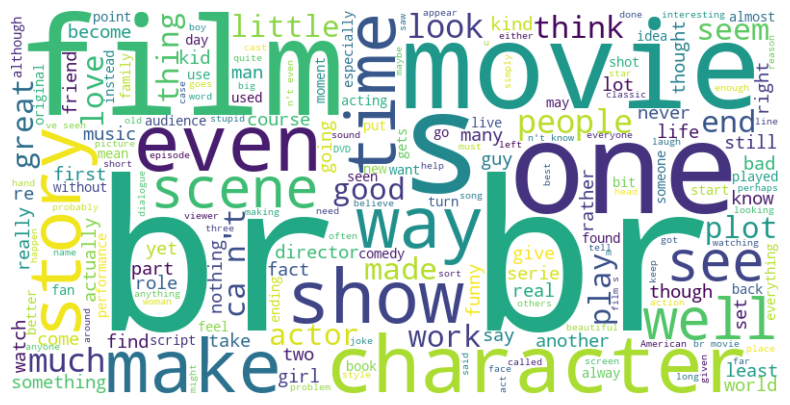

In [42]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()